In [ ]:
#Libraries imported
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder 
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn import svm
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error

In [7]:
#import the dataset
data=pd.read_csv("train.csv")
data

,row_id,time,x,y,direction,congestion
0,0,1991-04-01 00:00:00,0,0,EB,70
1,1,1991-04-01 00:00:00,0,0,NB,49
2,2,1991-04-01 00:00:00,0,0,SB,24
3,3,1991-04-01 00:00:00,0,1,EB,18
4,4,1991-04-01 00:00:00,0,1,NB,60
...,...,...,...,...,...,...
848830,848830,1991-09-30 11:40:00,2,3,NB,54
848831,848831,1991-09-30 11:40:00,2,3,NE,28
848832,848832,1991-09-30 11:40:00,2,3,SB,68
848833,848833,1991-09-30 11:40:00,2,3,SW,17


In [8]:
#checking for null
data.isnull().sum()

row_id        0
time          0
x             0
y             0
direction     0
congestion    0
dtype: int64

no null value found.

In [9]:
data.head()

,row_id,time,x,y,direction,congestion
0,0,1991-04-01 00:00:00,0,0,EB,70
1,1,1991-04-01 00:00:00,0,0,NB,49
2,2,1991-04-01 00:00:00,0,0,SB,24
3,3,1991-04-01 00:00:00,0,1,EB,18
4,4,1991-04-01 00:00:00,0,1,NB,60


In [10]:
data.tail()

,row_id,time,x,y,direction,congestion
848830,848830,1991-09-30 11:40:00,2,3,NB,54
848831,848831,1991-09-30 11:40:00,2,3,NE,28
848832,848832,1991-09-30 11:40:00,2,3,SB,68
848833,848833,1991-09-30 11:40:00,2,3,SW,17
848834,848834,1991-09-30 11:40:00,2,3,WB,24


In [11]:
data.describe()

,row_id,x,y,congestion
count,848835.00000,848835.000000,848835.000000,848835.000000
mean,424417.00000,1.138462,1.630769,47.815305
std,245037.70221,0.801478,1.089379,16.799392
min,0.00000,0.000000,0.000000,0.000000
25%,212208.50000,0.000000,1.000000,35.000000
50%,424417.00000,1.000000,2.000000,47.000000
75%,636625.50000,2.000000,3.000000,60.000000
max,848834.00000,2.000000,3.000000,100.000000


In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 848835 entries, 0 to 848834
Data columns (total 6 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   row_id      848835 non-null  int64 
 1   time        848835 non-null  object
 2   x           848835 non-null  int64 
 3   y           848835 non-null  int64 
 4   direction   848835 non-null  object
 5   congestion  848835 non-null  int64 
dtypes: int64(4), object(2)
memory usage: 38.9+ MB


In [13]:
data.direction.unique()

array(['EB', 'NB', 'SB', 'WB', 'NE', 'SW', 'NW', 'SE'], dtype=object)

In [14]:
data.columns

Index(['row_id', 'time', 'x', 'y', 'direction', 'congestion'], dtype='object')

In [15]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 848835 entries, 0 to 848834
Data columns (total 6 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   row_id      848835 non-null  int64 
 1   time        848835 non-null  object
 2   x           848835 non-null  int64 
 3   y           848835 non-null  int64 
 4   direction   848835 non-null  object
 5   congestion  848835 non-null  int64 
dtypes: int64(4), object(2)
memory usage: 38.9+ MB


# Feature Engineering

In [16]:
dc1=data
dc1

,row_id,time,x,y,direction,congestion
0,0,1991-04-01 00:00:00,0,0,EB,70
1,1,1991-04-01 00:00:00,0,0,NB,49
2,2,1991-04-01 00:00:00,0,0,SB,24
3,3,1991-04-01 00:00:00,0,1,EB,18
4,4,1991-04-01 00:00:00,0,1,NB,60
...,...,...,...,...,...,...
848830,848830,1991-09-30 11:40:00,2,3,NB,54
848831,848831,1991-09-30 11:40:00,2,3,NE,28
848832,848832,1991-09-30 11:40:00,2,3,SB,68
848833,848833,1991-09-30 11:40:00,2,3,SW,17


In [17]:
dc1.tail()

,row_id,time,x,y,direction,congestion
848830,848830,1991-09-30 11:40:00,2,3,NB,54
848831,848831,1991-09-30 11:40:00,2,3,NE,28
848832,848832,1991-09-30 11:40:00,2,3,SB,68
848833,848833,1991-09-30 11:40:00,2,3,SW,17
848834,848834,1991-09-30 11:40:00,2,3,WB,24


In [18]:
dc1["time"]=pd.to_datetime(dc1["time"])
dc1

,row_id,time,x,y,direction,congestion
0,0,1991-04-01 00:00:00,0,0,EB,70
1,1,1991-04-01 00:00:00,0,0,NB,49
2,2,1991-04-01 00:00:00,0,0,SB,24
3,3,1991-04-01 00:00:00,0,1,EB,18
4,4,1991-04-01 00:00:00,0,1,NB,60
...,...,...,...,...,...,...
848830,848830,1991-09-30 11:40:00,2,3,NB,54
848831,848831,1991-09-30 11:40:00,2,3,NE,28
848832,848832,1991-09-30 11:40:00,2,3,SB,68
848833,848833,1991-09-30 11:40:00,2,3,SW,17


In [19]:
dc1["date"]=dc1['time'].dt.day
dc1["month"]=dc1['time'].dt.month
dc1["year"]=dc1['time'].dt.year
dc1["day"]=dc1['time'].dt.strftime("%A")
dc1["hour"]=dc1['time'].dt.hour

In [20]:
dc1.head()

,row_id,time,x,y,direction,congestion,date,month,year,day,hour
0,0,1991-04-01,0,0,EB,70,1,4,1991,Monday,0
1,1,1991-04-01,0,0,NB,49,1,4,1991,Monday,0
2,2,1991-04-01,0,0,SB,24,1,4,1991,Monday,0
3,3,1991-04-01,0,1,EB,18,1,4,1991,Monday,0
4,4,1991-04-01,0,1,NB,60,1,4,1991,Monday,0


In [21]:
dc1.tail()

,row_id,time,x,y,direction,congestion,date,month,year,day,hour
848830,848830,1991-09-30 11:40:00,2,3,NB,54,30,9,1991,Monday,11
848831,848831,1991-09-30 11:40:00,2,3,NE,28,30,9,1991,Monday,11
848832,848832,1991-09-30 11:40:00,2,3,SB,68,30,9,1991,Monday,11
848833,848833,1991-09-30 11:40:00,2,3,SW,17,30,9,1991,Monday,11
848834,848834,1991-09-30 11:40:00,2,3,WB,24,30,9,1991,Monday,11


# EDA

Text(0.5, 0, 'direction')

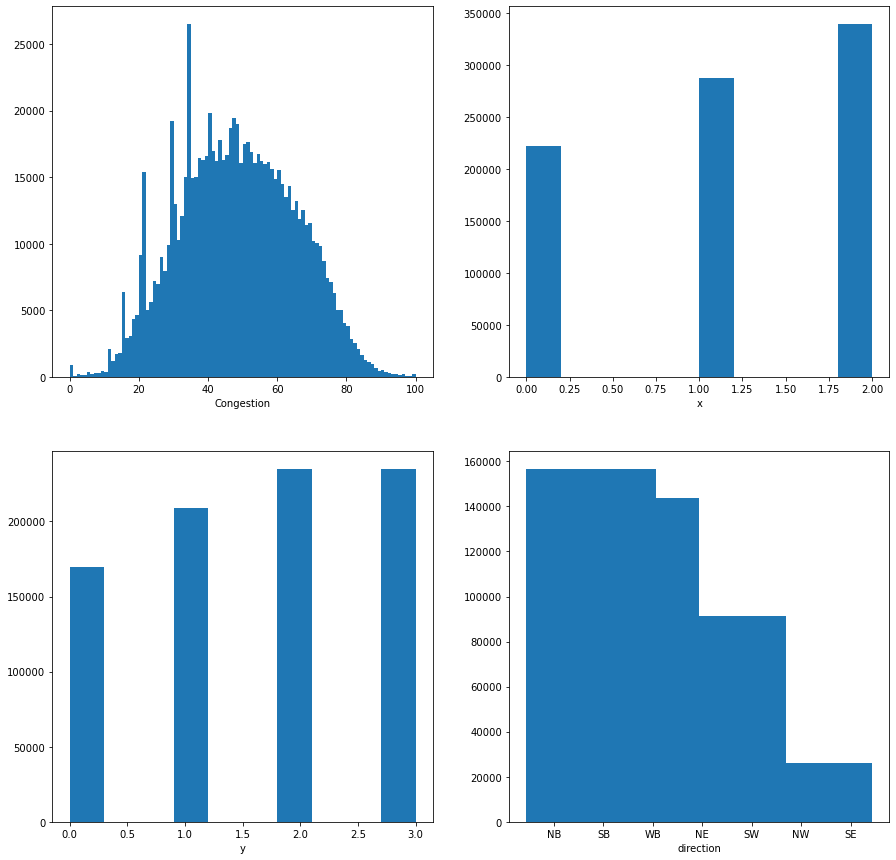

In [22]:
fig, ax = plt.subplots(2, 2, figsize=(15, 15))
ax[0, 0].hist(data['congestion'], bins=100)
ax[0, 0].set_xlabel('Congestion')

ax[0, 1].hist(data['x'])
ax[0, 1].set_xlabel('x')

ax[1, 0].hist(data['y'])
ax[1, 0].set_xlabel('y')

ax[1,1].hist(data['direction'], bins=data['direction'].nunique(), align='right')
ax[1, 1].set_xlabel('direction')

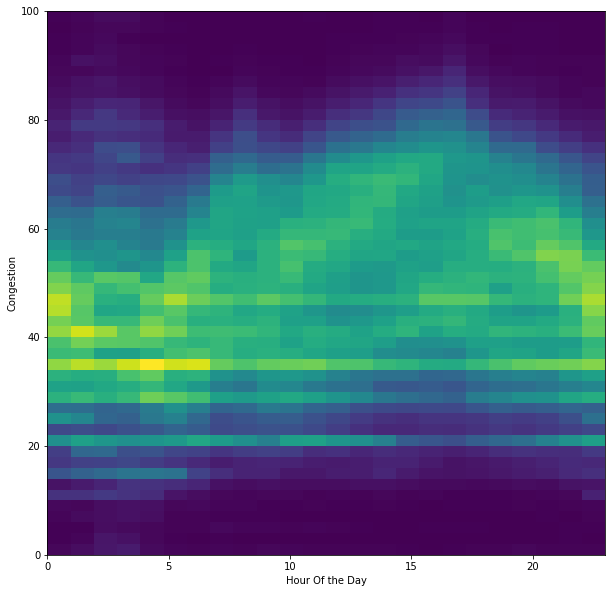

In [23]:
#Relation between cogestion and Time
fig, ax = plt.subplots(1, 1, figsize=(10, 10))
ax.hist2d(dc1['hour'], dc1['congestion'], bins=(24, 50))
ax.set_ylabel('Congestion')
ax.set_xlabel('Hour Of the Day')
plt.show()

# Encoding

In [24]:
df=data
df

,row_id,time,x,y,direction,congestion,date,month,year,day,hour
0,0,1991-04-01 00:00:00,0,0,EB,70,1,4,1991,Monday,0
1,1,1991-04-01 00:00:00,0,0,NB,49,1,4,1991,Monday,0
2,2,1991-04-01 00:00:00,0,0,SB,24,1,4,1991,Monday,0
3,3,1991-04-01 00:00:00,0,1,EB,18,1,4,1991,Monday,0
4,4,1991-04-01 00:00:00,0,1,NB,60,1,4,1991,Monday,0
...,...,...,...,...,...,...,...,...,...,...,...
848830,848830,1991-09-30 11:40:00,2,3,NB,54,30,9,1991,Monday,11
848831,848831,1991-09-30 11:40:00,2,3,NE,28,30,9,1991,Monday,11
848832,848832,1991-09-30 11:40:00,2,3,SB,68,30,9,1991,Monday,11
848833,848833,1991-09-30 11:40:00,2,3,SW,17,30,9,1991,Monday,11


In [25]:
X=df.drop(columns=['congestion','time','row_id'],axis=1)
Y=df['congestion']
X

,x,y,direction,date,month,year,day,hour
0,0,0,EB,1,4,1991,Monday,0
1,0,0,NB,1,4,1991,Monday,0
2,0,0,SB,1,4,1991,Monday,0
3,0,1,EB,1,4,1991,Monday,0
4,0,1,NB,1,4,1991,Monday,0
...,...,...,...,...,...,...,...,...
848830,2,3,NB,30,9,1991,Monday,11
848831,2,3,NE,30,9,1991,Monday,11
848832,2,3,SB,30,9,1991,Monday,11
848833,2,3,SW,30,9,1991,Monday,11


In [26]:
Y

0         70
1         49
2         24
3         18
4         60
          ..
848830    54
848831    28
848832    68
848833    17
848834    24
Name: congestion, Length: 848835, dtype: int64

In [27]:
X['direction']=LabelEncoder().fit_transform(X['direction'])
X['day']=LabelEncoder().fit_transform(X['day'])

In [28]:
X

,x,y,direction,date,month,year,day,hour
0,0,0,0,1,4,1991,1,0
1,0,0,1,1,4,1991,1,0
2,0,0,4,1,4,1991,1,0
3,0,1,0,1,4,1991,1,0
4,0,1,1,1,4,1991,1,0
...,...,...,...,...,...,...,...,...
848830,2,3,1,30,9,1991,1,11
848831,2,3,2,30,9,1991,1,11
848832,2,3,4,30,9,1991,1,11
848833,2,3,6,30,9,1991,1,11


# SVM

In [29]:
Y_SVM= Y.values
X_SVM=X.values

In [30]:
X_train,X_test,Y_train,Y_test=train_test_split(X.values,Y.values,test_size = 0.25, random_state = 0)

In [31]:
print(Y_train)

[38 64 52 ... 65 70 37]


In [32]:
print(X_train)

[[   1    0    7 ... 1991    1    0]
 [   1    3    4 ... 1991    6   21]
 [   0    2    1 ... 1991    5   22]
 ...
 [   2    0    7 ... 1991    0    7]
 [   0    1    1 ... 1991    6    9]
 [   0    3    7 ... 1991    6   13]]


In [33]:
print(X_test)

[[   2    2    4 ... 1991    2    2]
 [   2    2    5 ... 1991    1   18]
 [   1    2    2 ... 1991    5   17]
 ...
 [   1    0    7 ... 1991    5    1]
 [   1    0    7 ... 1991    2    7]
 [   0    3    6 ... 1991    2    7]]


In [34]:
print(Y_test)

[33 60 57 ... 45 39 28]


In [ ]:
cl=SVR(kernel='rbf')
cross_val_score(cl, X_train, Y_train, cv=10)

In [ ]:
cl.fit(X_train,Y_train)
pred= cl.predict(X_test)
print("Mean squared error:  ",mean_squared_error(pred,Y_test))

# Random Forest

In [ ]:
forest = RandomForestRegressor(n_estimators= 10, random_state=100)
LinearRegression().fit(X_train,Y_train)
forest.fit(X_train,Y_train)

In [ ]:
pred = lin_reg.predict(X_test)
pred = forest.predict(X_test)